In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm_notebook

ModuleNotFoundError: No module named 'gensim'

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

In [43]:
train_data = pd.read_table('ratings.txt')

### 데이터 살펴보기

In [44]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [45]:
print("리뷰는 총 {}개 입니다.".format(len(train_data)))

리뷰는 총 200000개 입니다.


In [46]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
if train_data.isnull().values.any() == True:
    print("Null 값이 존재합니다.")
else: print("Null 값이 존재하지 않습니다")

Null 값이 존재하지 않습니다


In [47]:
print("정제된 리뷰는 총 {}개 입니다.".format(len(train_data)))

정제된 리뷰는 총 199992개 입니다.


In [49]:
# 정규표현식을 사용해 한글만 남기기
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 불용어 (stopwords) 정의하기
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

### 토큰화하기

In [50]:
okt = Okt()
tokenized_data = []
for sentence in tqdm_notebook(train_data['document']):
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

C:\Users\dykli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
import pickle
## 여기 코드들은 위 과정이 너무 오래걸리기 때문에 한번 돌리면 그 결과물을 저장해 놓는 용도로 사용합니다.

# 한번돌린 tokenized_data 저장해놓기
# with open('tokenized_data.pickle', 'wb') as f:
#     pickle.dump(tokenized_data, f, pickle.HIGHEST_PROTOCOL)

# 이미 저장되어있는 tokenized_data 불러오기
# with open('tokenized_data.pickle', 'rb') as f:
#     tokenized_data = pickle.load(f)

### 리뷰 분석하기

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


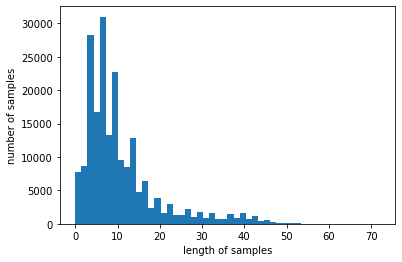

In [52]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### word embedding 만들기

In [53]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [55]:
len(model.wv.vocab.keys())

16477

In [56]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [57]:
# 워드 임베딩 살펴보기
model.wv.vectors

array([[ 1.1308408e+00, -1.1732428e+00,  1.2380937e+00, ...,
         5.3685611e-01, -4.2735723e-01,  3.4616309e-01],
       [ 9.8176265e-01, -2.6307991e-01,  1.4089570e+00, ...,
         1.3612516e+00,  1.2400163e+00, -7.5996774e-01],
       [-2.3410347e-01,  7.0076299e-01,  8.0989391e-01, ...,
         3.7117422e-01, -1.4478384e+00,  1.2607708e+00],
       ...,
       [ 3.3621591e-02,  3.0737333e-03, -2.5057404e-03, ...,
        -6.1127745e-02,  5.0446112e-02, -4.4807877e-02],
       [ 1.7622951e-02,  9.6339303e-05,  1.6894124e-02, ...,
         2.6823482e-02, -3.3355601e-02, -5.2862209e-03],
       [ 4.5839385e-03, -5.3115445e-03,  4.7859307e-02, ...,
        -9.8509610e-02,  5.5488449e-02, -3.8485970e-02]], dtype=float32)

In [58]:
model.wv.vocab.keys()

dict_keys(['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ', '디자인', '을', '배우다', '학생', '외국', '디자이너', '그', '전통', '통해', '발전', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '어렵다', '시절', '끝', '까지', '열정', '지키다', '같다', '있다', '저', '사람', '꿈', '꾸다', '이루다', '나가다', '수', '것', '감사하다', '폴리스스토리', '시리즈', '부터', '뉴', '버리다', '하나', '없다', '최고', '오다', '연기', '진짜', '개', '쩔다', '지루하다', '생각', '몰입', '그렇다', '이렇다', '영화', '지', '안개', '밤하늘', '뜨다', '사랑', '해보다', '라면', '처음', '웃다', '완전', '감동', '이다', '전쟁', '나오다', '빠', '로', '싶다', '굿', '바보', '아니다', '병', '쉰', '내', '나이', '나', '적', '하지만', '훗날', '사하나', '하', '감정', '완벽하다', '이해', '고질', '라니', '무', '귀엽다', '능', '오페라', '화', '라고', '작품', '극단', '평', '어쩔', '듯', '반전', '좋다', '제', '평점', '왜', '낮다', '긴장감', '스릴', '감', '인데', '전장', '에서', '느끼다', '공포', '생생하다', '전', '해주다', '네', '고시', '터', '랑', '소재', '만', '뿐', '아무렇다', '관련', '단연', '가면', '갈수록', '더욱', '빠지다', '드', '요', '밀회', '화이팅', '어', '없이', '상당하다', '작', '일', '본', '마음', '들다', '강렬하다', '임팩트', '일품', '오랜', '제대로', '되다', '범죄', '스릴러', '그저', '좋아하다', '마디', '말', '꺼내다', '벅

In [60]:
model.wv['영화']

array([ 1.1308408 , -1.1732428 ,  1.2380937 , -0.40664756, -0.43401563,
        0.6356033 ,  0.5030358 ,  0.7801489 , -1.0647508 ,  0.02196845,
        1.8771913 , -0.514788  , -0.13721752, -1.2324271 , -0.7452844 ,
       -1.134543  , -0.0191783 , -0.6788841 , -1.3603765 ,  0.3537001 ,
        0.23356695,  0.25561023, -0.04958399, -0.13033086, -0.39291984,
       -0.12706816,  1.5346129 ,  0.6577562 ,  0.23610537, -2.4159963 ,
        0.37072724,  0.6248032 , -0.01362889, -0.88382053, -1.5201032 ,
        0.22445172, -0.08967128, -0.8001022 , -0.22809044, -1.1050407 ,
       -0.1200595 ,  1.8904684 , -0.24450527,  0.8687502 ,  0.6792595 ,
       -0.24840122,  1.3082337 ,  0.706558  ,  0.38311583,  0.45502043,
        0.71776325,  0.9506668 , -0.48316985, -0.5157453 , -0.13574977,
        0.22169133,  0.45834896, -1.0363104 ,  1.5215188 , -0.3695044 ,
        1.3346728 , -2.871128  , -0.7193244 , -0.40938595,  0.97326034,
       -0.0520747 ,  0.1713335 ,  1.4891932 , -0.42736512,  1.26

### word2vec을 사용한 유사단어 찾기

In [61]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8806266784667969), ('안성기', 0.8706645369529724), ('박중훈', 0.8670752644538879), ('크로우', 0.8575588464736938), ('최민수', 0.8517550230026245), ('윤제문', 0.8495416045188904), ('설경구', 0.8485738635063171), ('러셀', 0.8416953086853027), ('김수현', 0.8351336121559143), ('박신양', 0.8349049687385559)]


In [62]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8941442966461182), ('느와르', 0.8629850745201111), ('무협', 0.8611087799072266), ('호러', 0.8423821330070496), ('정통', 0.8290895223617554), ('무비', 0.8282071352005005), ('블록버스터', 0.8271080851554871), ('물', 0.8075276613235474), ('홍콩', 0.8055539131164551), ('물의', 0.8021906018257141)]
